In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/taxi_trip_pricing (1).csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()
print("\nMissing Values:\n", data.isnull().sum())


Dataset Head:
    Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3    

In [ ]:
# prompt: I WANT TO PRINT FEATURES AND TOTAL ROWS

import pandas as pd

# Load the dataset
file_path = '/content/taxi_trip_pricing (1).csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()
print("\nMissing Values:\n", data.isnull().sum())

# Print features (columns)
print("\nFeatures (Columns):\n", data.columns.tolist())

# Print total rows
print("\nTotal Rows:", len(data))

Dataset Head:
    Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3    

In [ ]:
missing_percentage = data['Trip_Price'].isnull().mean() * 100
print(f"Percentage of missing values in 'price': {missing_percentage:.2f}%")


Percentage of missing values in 'price': 4.90%


Number of outliers in Trip_Price: 26
Number of outliers in Trip_Duration_Minutes: 0
Number of outliers in Trip_Distance_km: 20
Number of outliers in Passenger_Count: 0
Number of outliers in Per_Km_Rate: 0


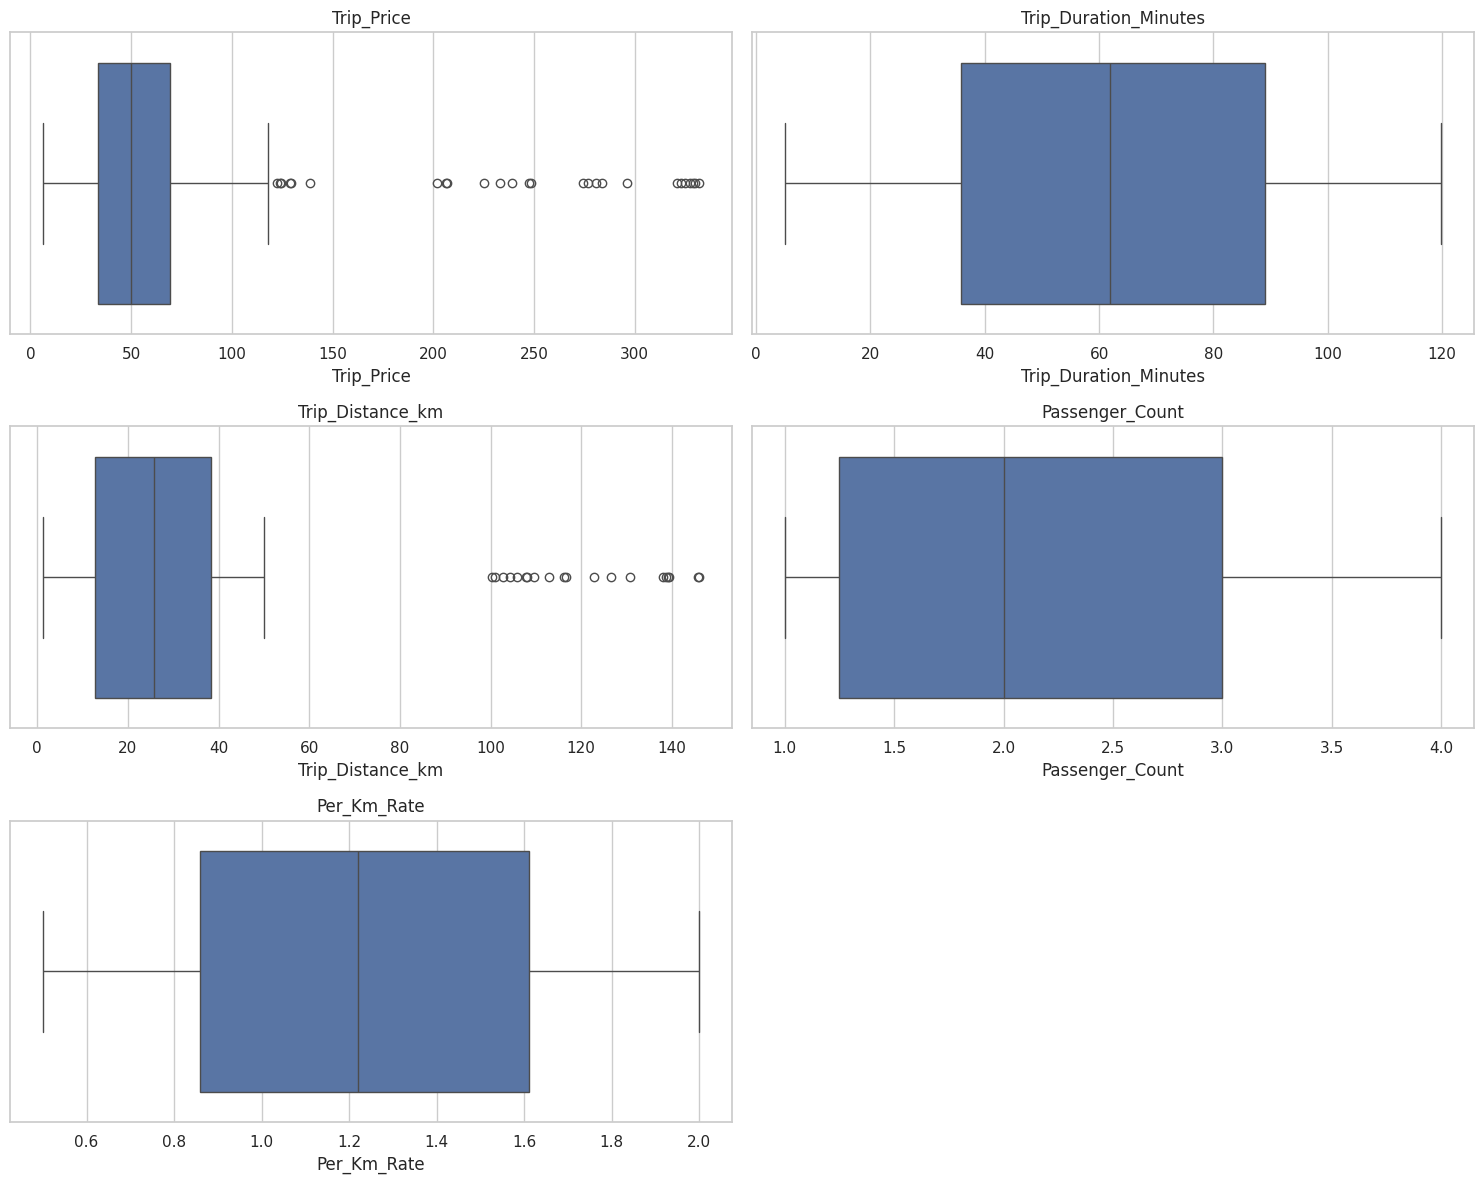

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to calculate outliers based on IQR
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Columns to plot and analyze
columns = ['Trip_Price', 'Trip_Duration_Minutes', 'Trip_Distance_km', 'Passenger_Count', 'Per_Km_Rate']

# Set up the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot boxplots and print outliers
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

    # Print the number of outliers for each column
    outlier_count = count_outliers(data, column)
    print(f"Number of outliers in {column}: {outlier_count}")

# Remove the last empty subplot (bottom-right)
fig.delaxes(axes[2, 1])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


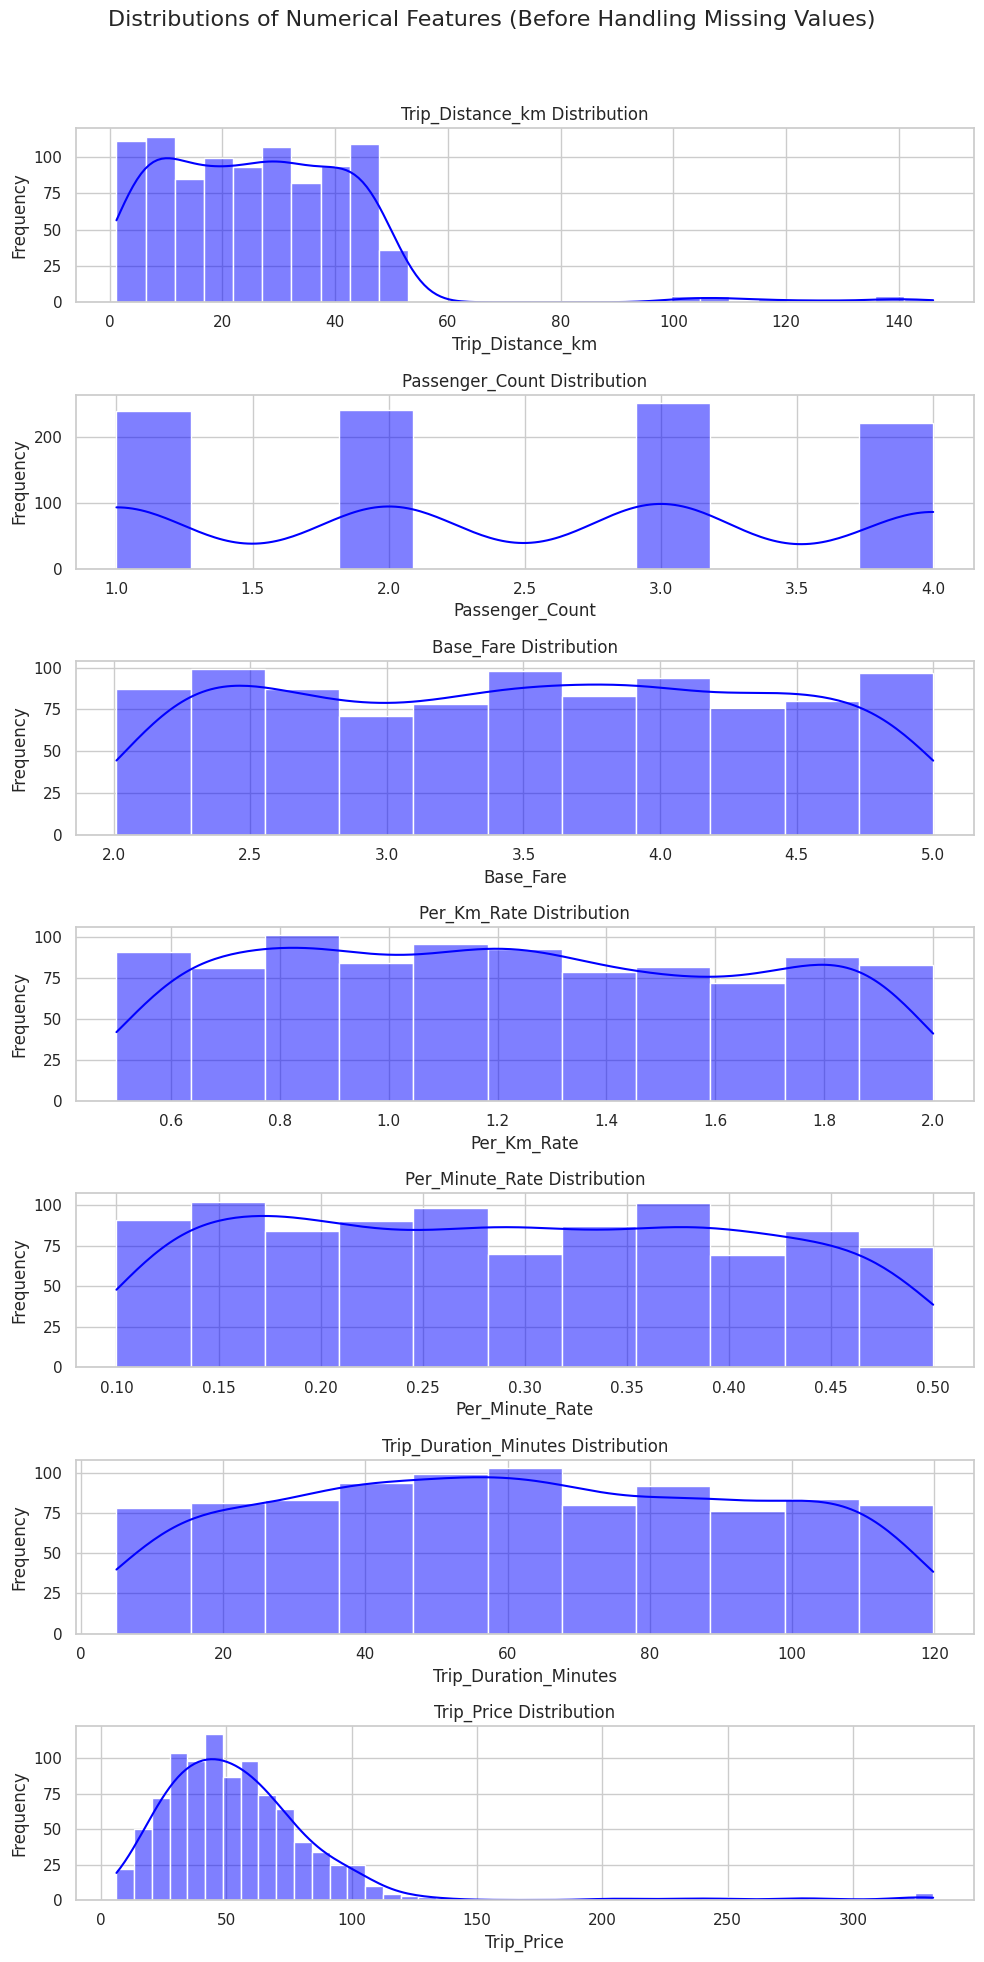

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Visualize distributions of numerical features before handling missing values
numerical_columns = data.select_dtypes(include=['float64']).columns

fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 20))
fig.suptitle("Distributions of Numerical Features (Before Handling Missing Values)", fontsize=16)

for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
data.describe()


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


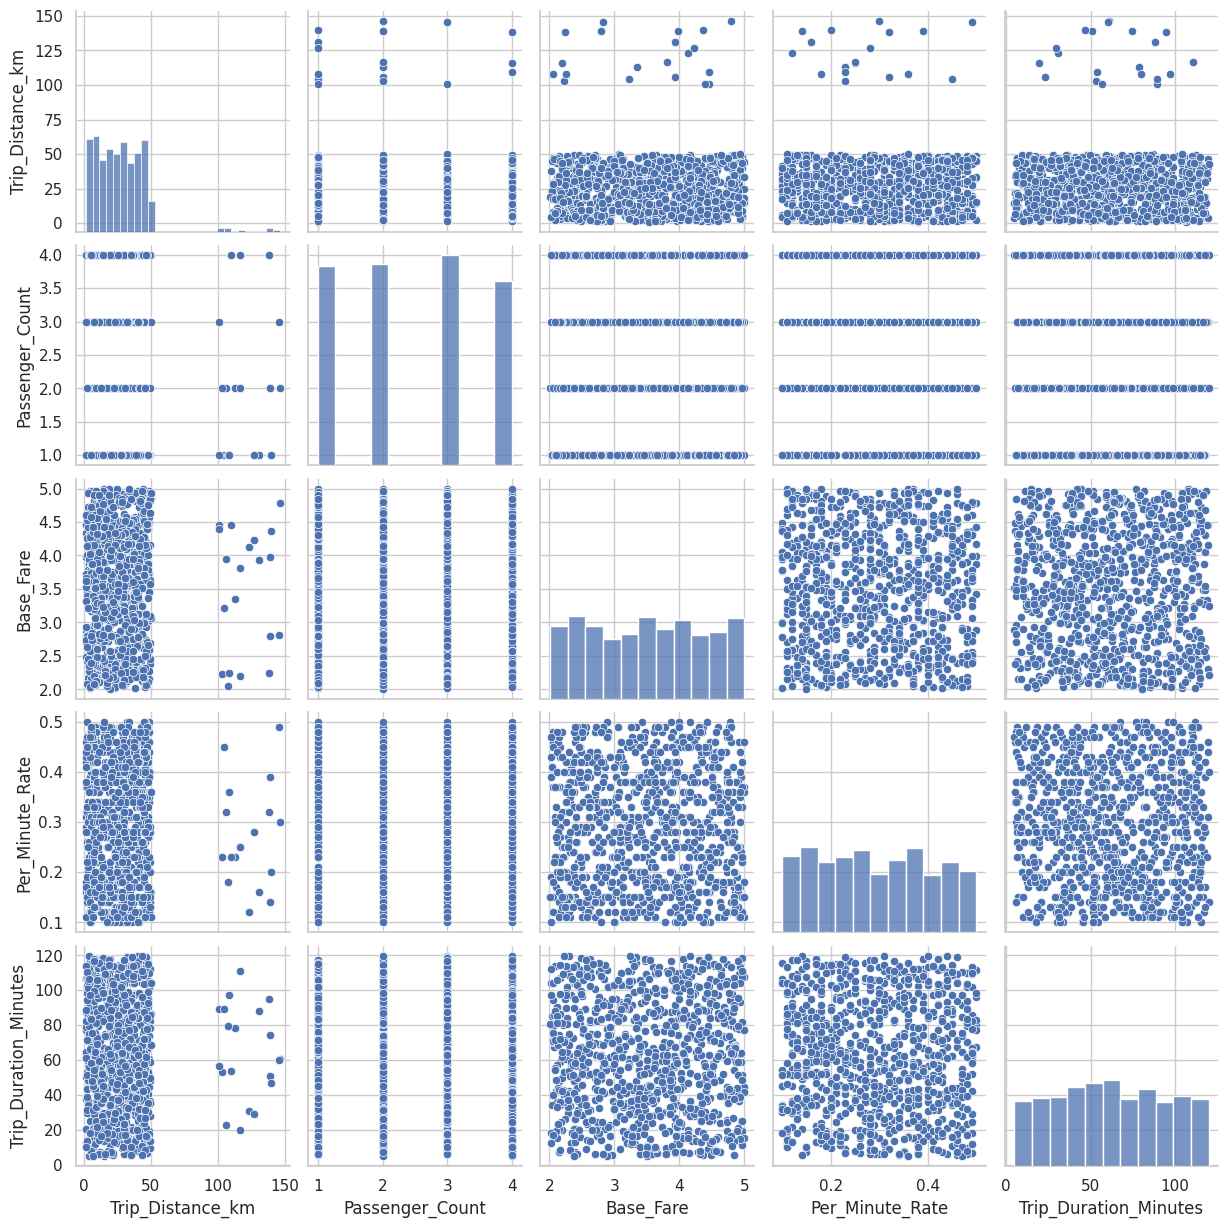

In [ ]:
cols = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Minute_Rate', 'Trip_Duration_Minutes']
sns_plot = sns.pairplot(data[cols])
sns_plot.savefig('pairplot.png')

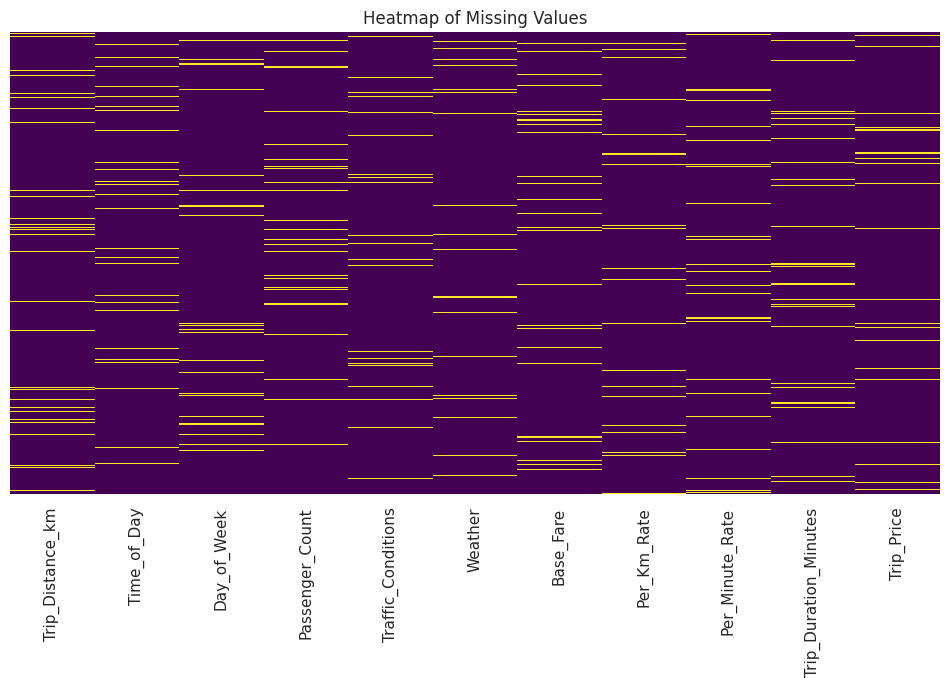

<ipython-input-178-4a2ebe72c0da>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


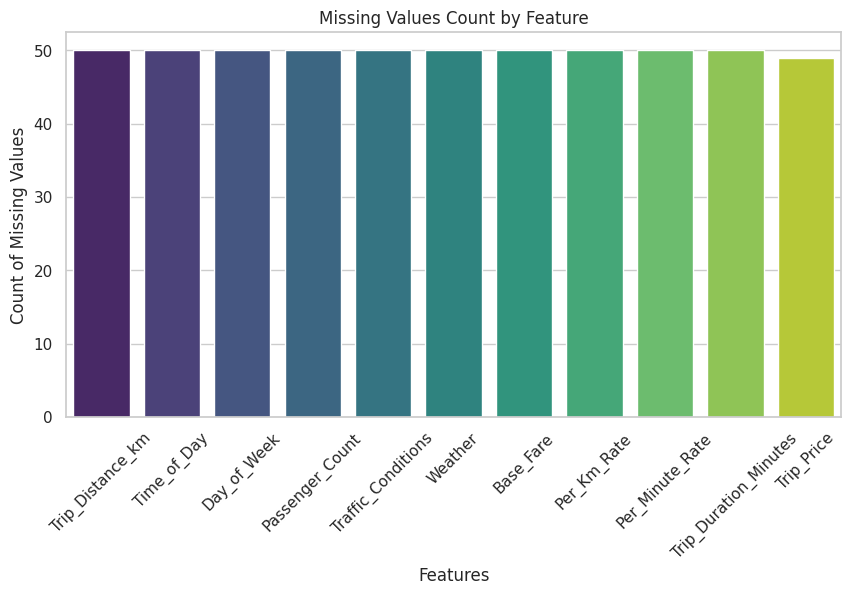

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

# Bar plot of missing values count for each column
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Missing Values Count by Feature")
plt.ylabel("Count of Missing Values")
plt.xlabel("Features")
plt.show()


In [ ]:
# Calculate minimum and maximum values for the target variable
min_value = data['Trip_Price'].min()
max_value = data['Trip_Price'].max()

# Calculate the range
range_value = max_value - min_value

# Print the results
print(f"Minimum value of Trip_Price: {min_value}")
print(f"Maximum value of Trip_Price: {max_value}")
print(f"Range of Trip_Price: {range_value}")


Minimum value of Trip_Price: 6.1269
Maximum value of Trip_Price: 332.0436886774302
Range of Trip_Price: 325.91678867743025


In [ ]:
columns_miss = data.columns[data.isnull().sum() > 0]

data[columns_miss].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


Trip_Distance_km - Mean: 27.07, Median: 25.83


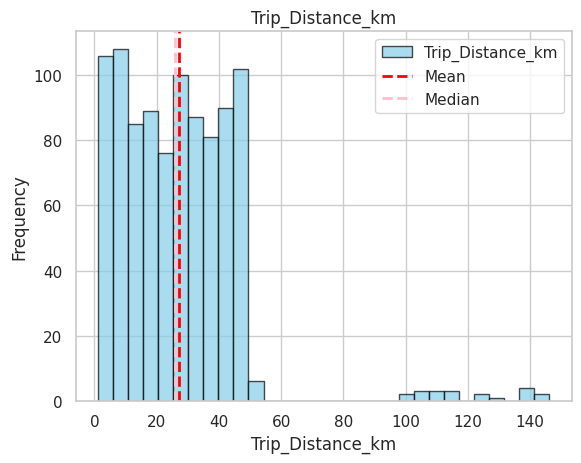

Passenger_Count - Mean: 2.48, Median: 2.00


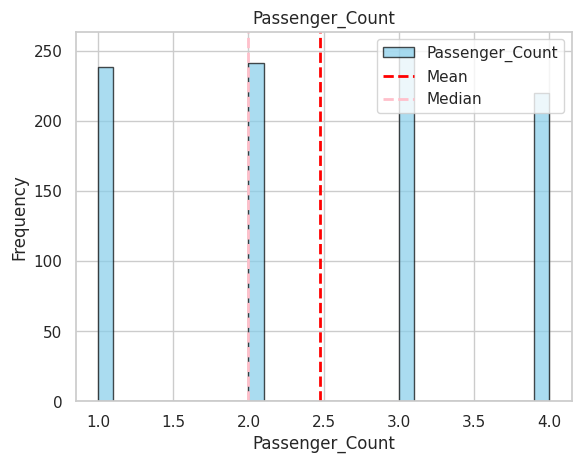

Base_Fare - Mean: 3.50, Median: 3.52


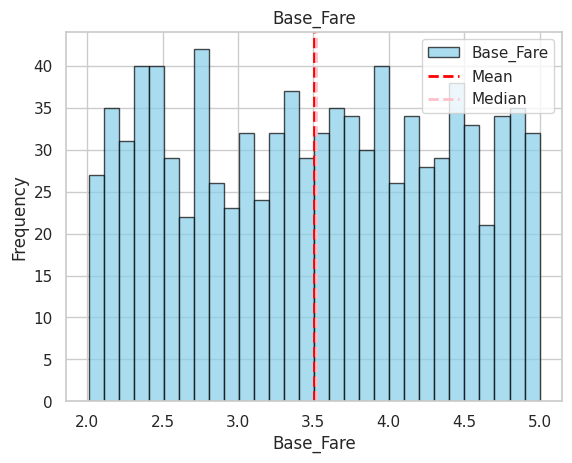

Per_Km_Rate - Mean: 1.23, Median: 1.22


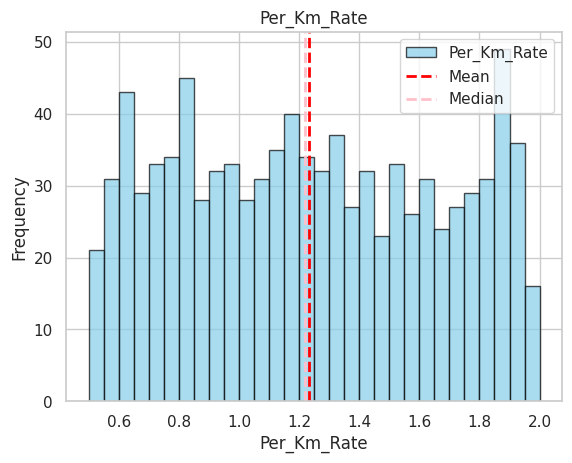

Per_Minute_Rate - Mean: 0.29, Median: 0.29


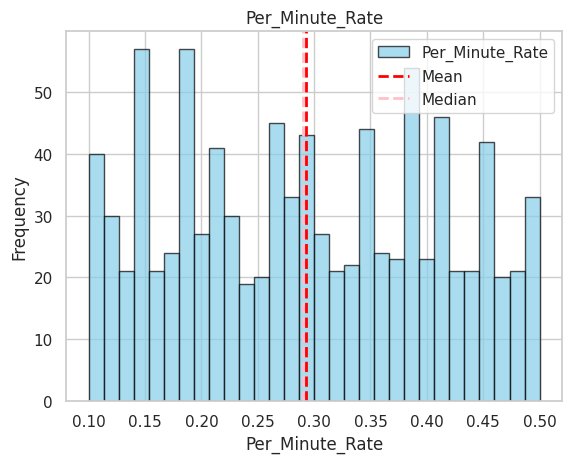

Trip_Duration_Minutes - Mean: 62.12, Median: 61.86


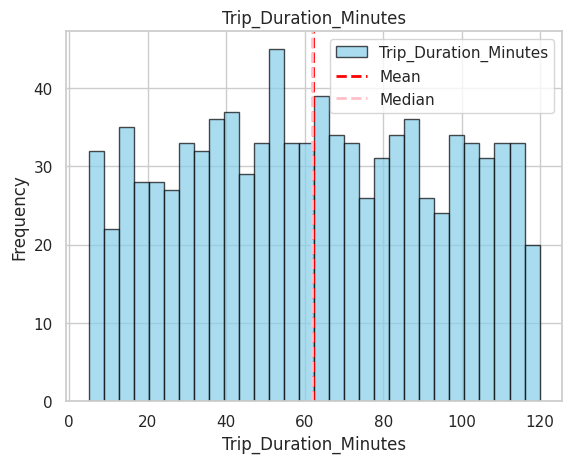

Trip_Price - Mean: 56.87, Median: 50.07


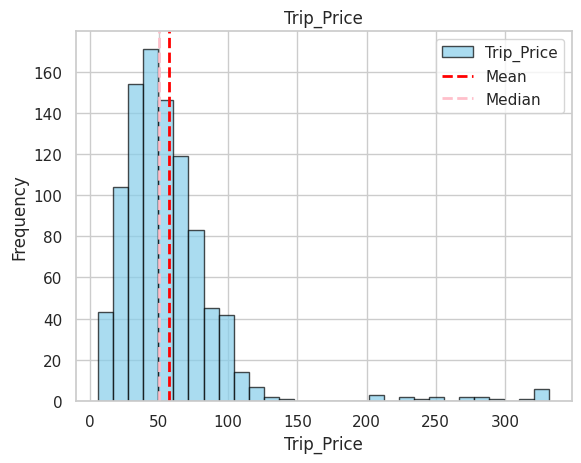

In [ ]:
import matplotlib.pyplot as plt

# List of columns with missing values
columns_with_missing = [
    'Trip_Distance_km', 'Passenger_Count', 'Base_Fare',
    'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'
]

# Loop through each column to calculate statistics and plot
for column in columns_with_missing:
    # Calculate mean and median
    mean_value = data[column].mean()
    median_value = data[column].median()

    # Print mean and median
    print(f"{column} - Mean: {mean_value:.2f}, Median: {median_value:.2f}")

    # Plot histogram
    data[column].plot(kind='hist', bins=30, title=column, alpha=0.7, color='skyblue', edgecolor='black')

    # Add vertical lines for mean and median
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median_value, color='pink', linestyle='dashed', linewidth=2, label='Median')

    # Add legend and labels
    plt.legend()
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()


In [ ]:
data['Trip_Distance_km'].fillna(data['Trip_Distance_km'].median(), inplace=True)
data['Passenger_Count'].fillna(data['Passenger_Count'].median(), inplace=True)
data['Base_Fare'].fillna(data['Base_Fare'].median(), inplace=True)
data['Per_Km_Rate'].fillna(data['Per_Km_Rate'].median(), inplace=True)
data['Per_Minute_Rate'].fillna(data['Per_Minute_Rate'].median(), inplace=True)
data['Trip_Duration_Minutes'].fillna(data['Trip_Duration_Minutes'].median(), inplace=True)
data['Trip_Price'].fillna(data['Trip_Price'].median(), inplace=True)

In [ ]:
data['Time_of_Day'] = data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0])
data['Day_of_Week'] = data['Day_of_Week'].fillna(data['Day_of_Week'].mode()[0])
data['Traffic_Conditions'] = data['Traffic_Conditions'].fillna(data['Traffic_Conditions'].mode()[0])
data['Weather'] = data['Weather'].fillna(data['Weather'].mode()[0])

In [ ]:
data.info()
print("\nMissing Values:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           1000 non-null   float64
 1   Passenger_Count            1000 non-null   float64
 2   Base_Fare                  1000 non-null   float64
 3   Per_Km_Rate                1000 non-null   float64
 4   Per_Minute_Rate            1000 non-null   float64
 5   Trip_Duration_Minutes      1000 non-null   float64
 6   Trip_Price                 1000 non-null   float64
 7   Time_of_Day_Evening        1000 non-null   bool   
 8   Time_of_Day_Morning        1000 non-null   bool   
 9   Time_of_Day_Night          1000 non-null   bool   
 10  Day_of_Week_Weekend        1000 non-null   bool   
 11  Traffic_Conditions_Low     1000 non-null   bool   
 12  Traffic_Conditions_Medium  1000 non-null   bool   
 13  Weather_Rain               1000 non-null   bool  

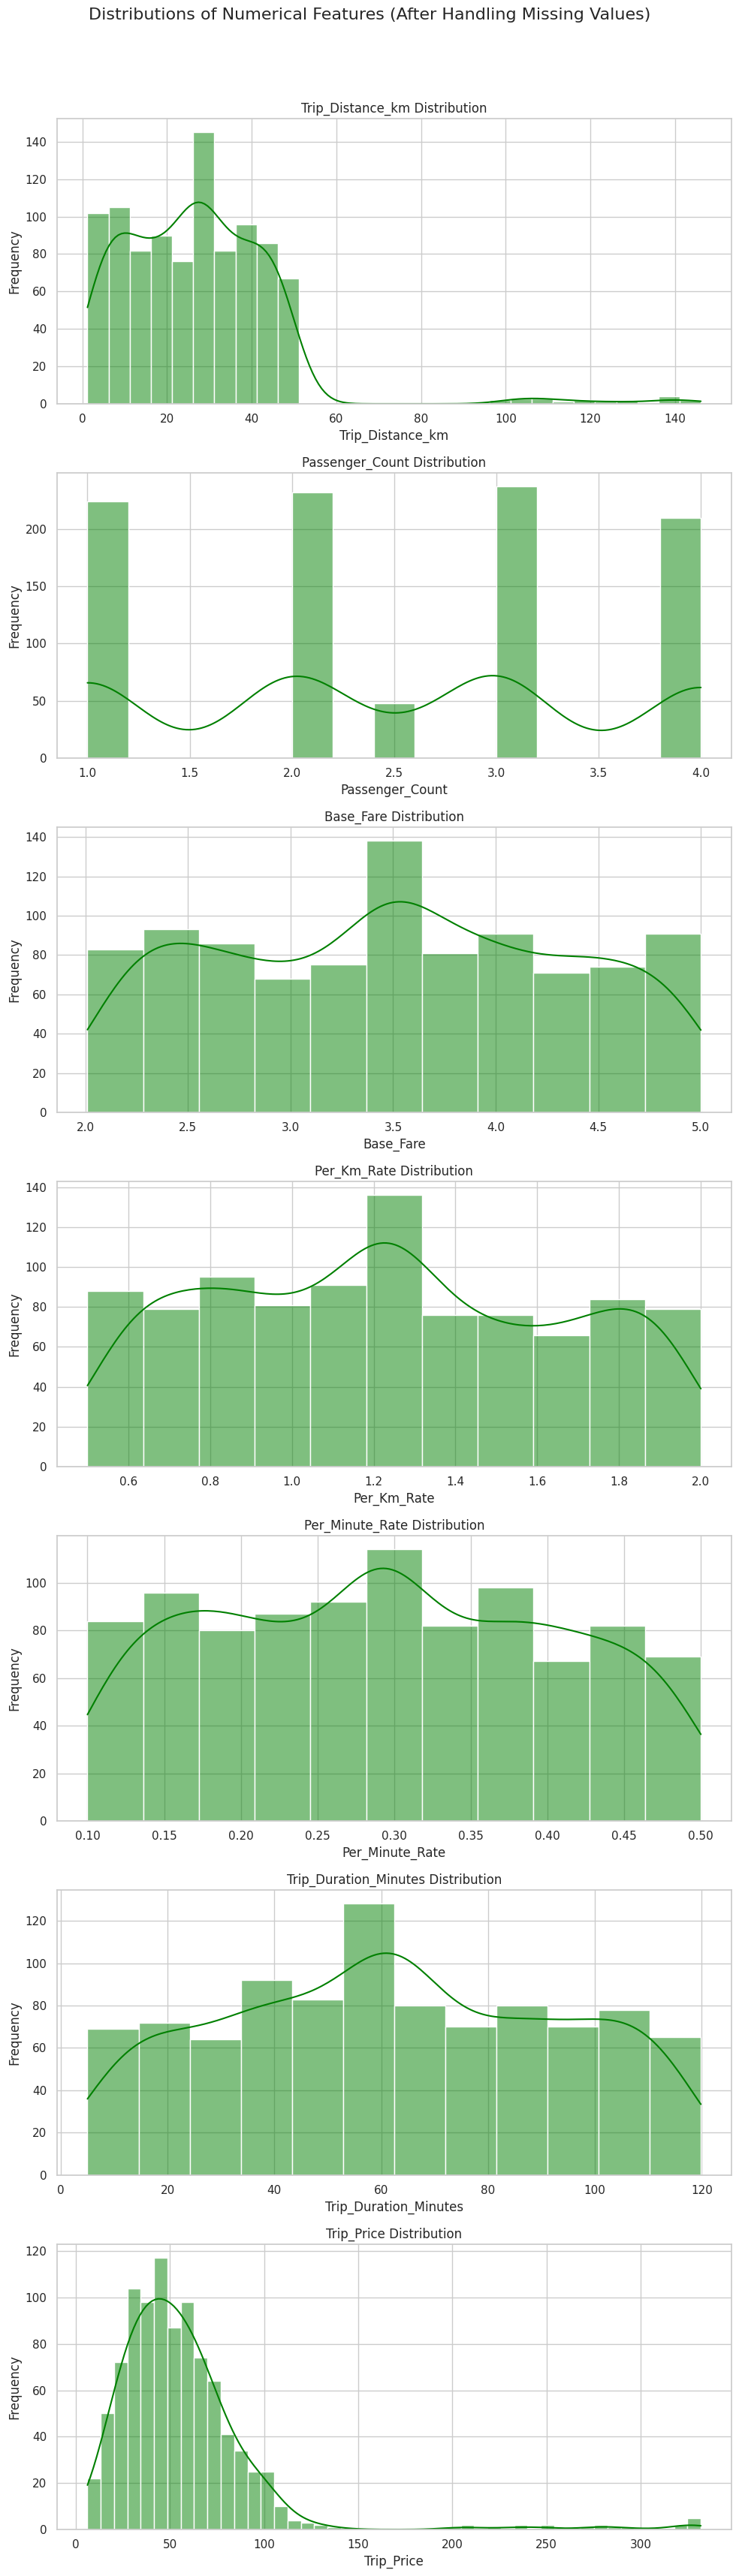

<ipython-input-185-71b9917ae4a8>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=column, ax=axes[i], palette="viridis")
<ipython-input-185-71b9917ae4a8>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=column, ax=axes[i], palette="viridis")
<ipython-input-185-71b9917ae4a8>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=column, ax=axes[i], palette="viridis")
<ipython-input-185-71b9917ae4a8>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

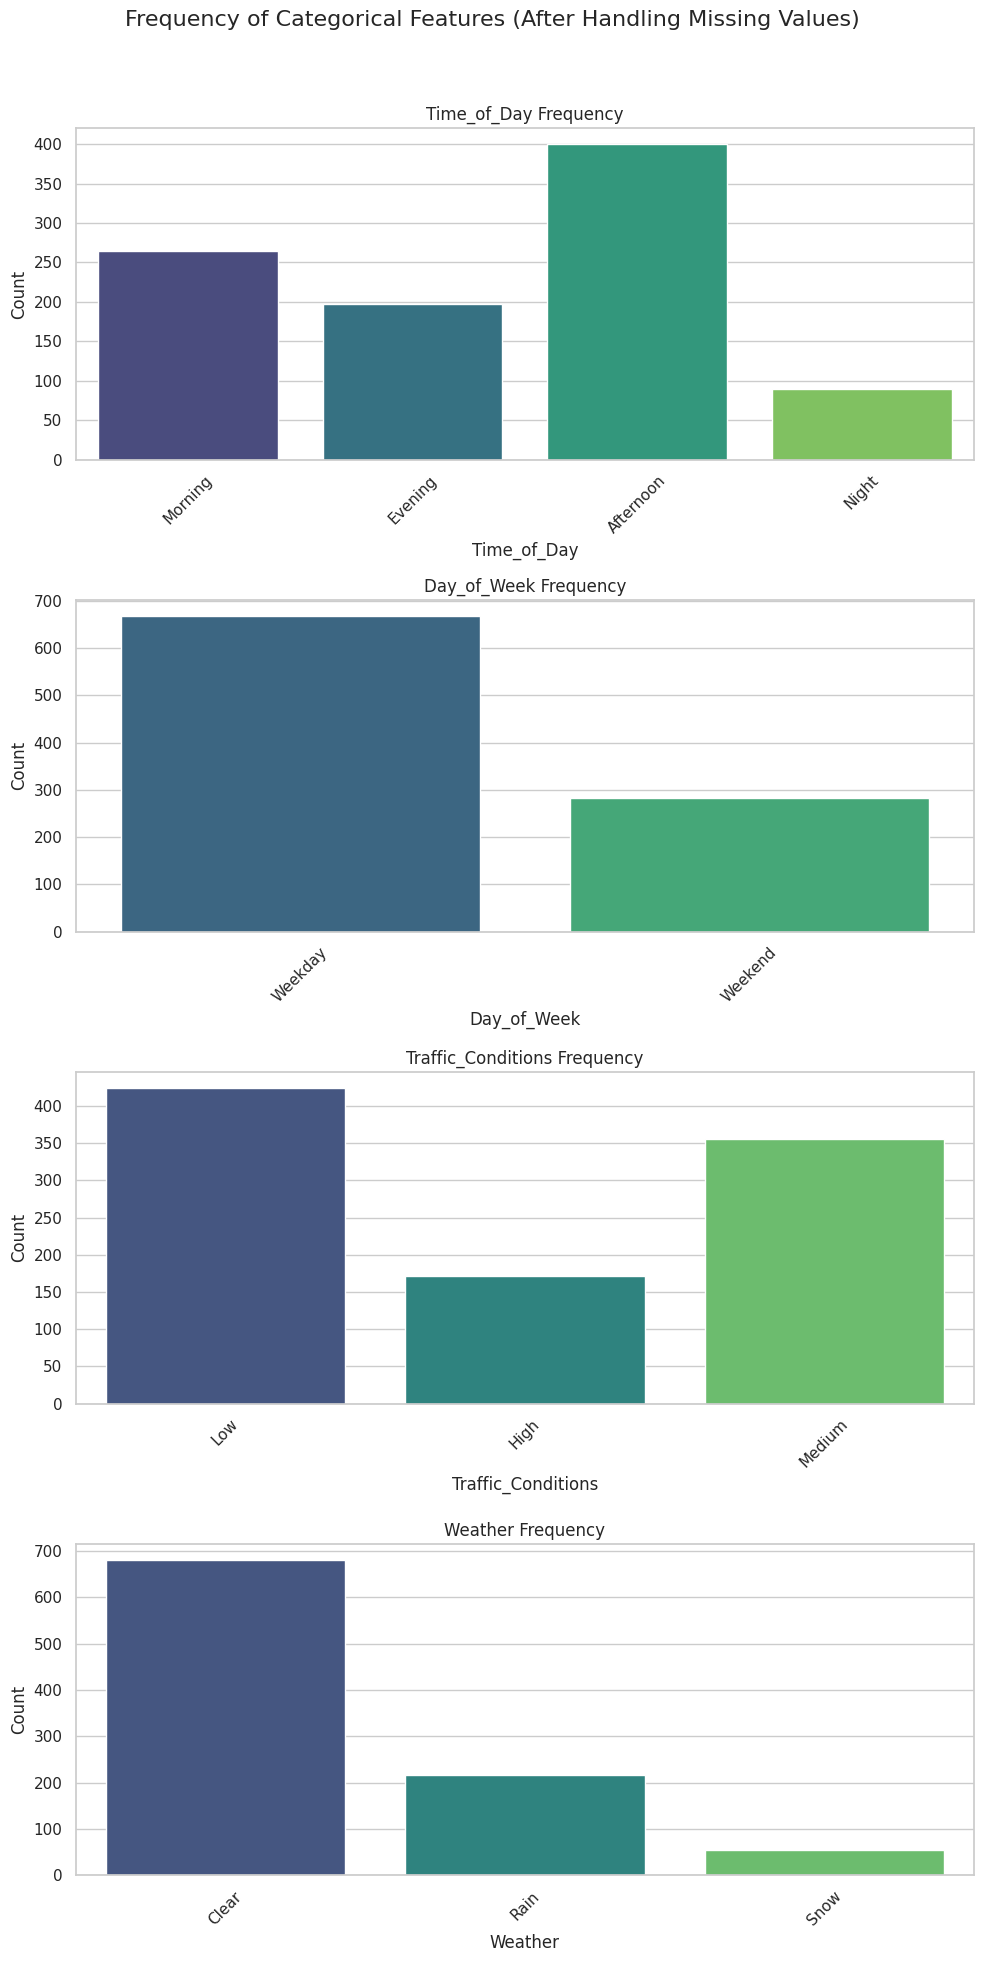

Total number of rows: 951


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Separate numerical and categorical columns
numerical_columns = data_cleaned.select_dtypes(include=['float64']).columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Visualize numerical features
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 5 * len(numerical_columns)))
fig.suptitle("Distributions of Numerical Features (After Handling Missing Values)", fontsize=16)

for i, column in enumerate(numerical_columns):
    sns.histplot(data_cleaned[column], kde=True, ax=axes[i], color="green")
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Visualize categorical features
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 5 * len(categorical_columns)))
fig.suptitle("Frequency of Categorical Features (After Handling Missing Values)", fontsize=16)

for i, column in enumerate(categorical_columns):
    sns.countplot(data=data_cleaned, x=column, ax=axes[i], palette="viridis")
    axes[i].set_title(f"{column} Frequency")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
total_rows = data_cleaned.shape[0]
print("Total number of rows:", total_rows)


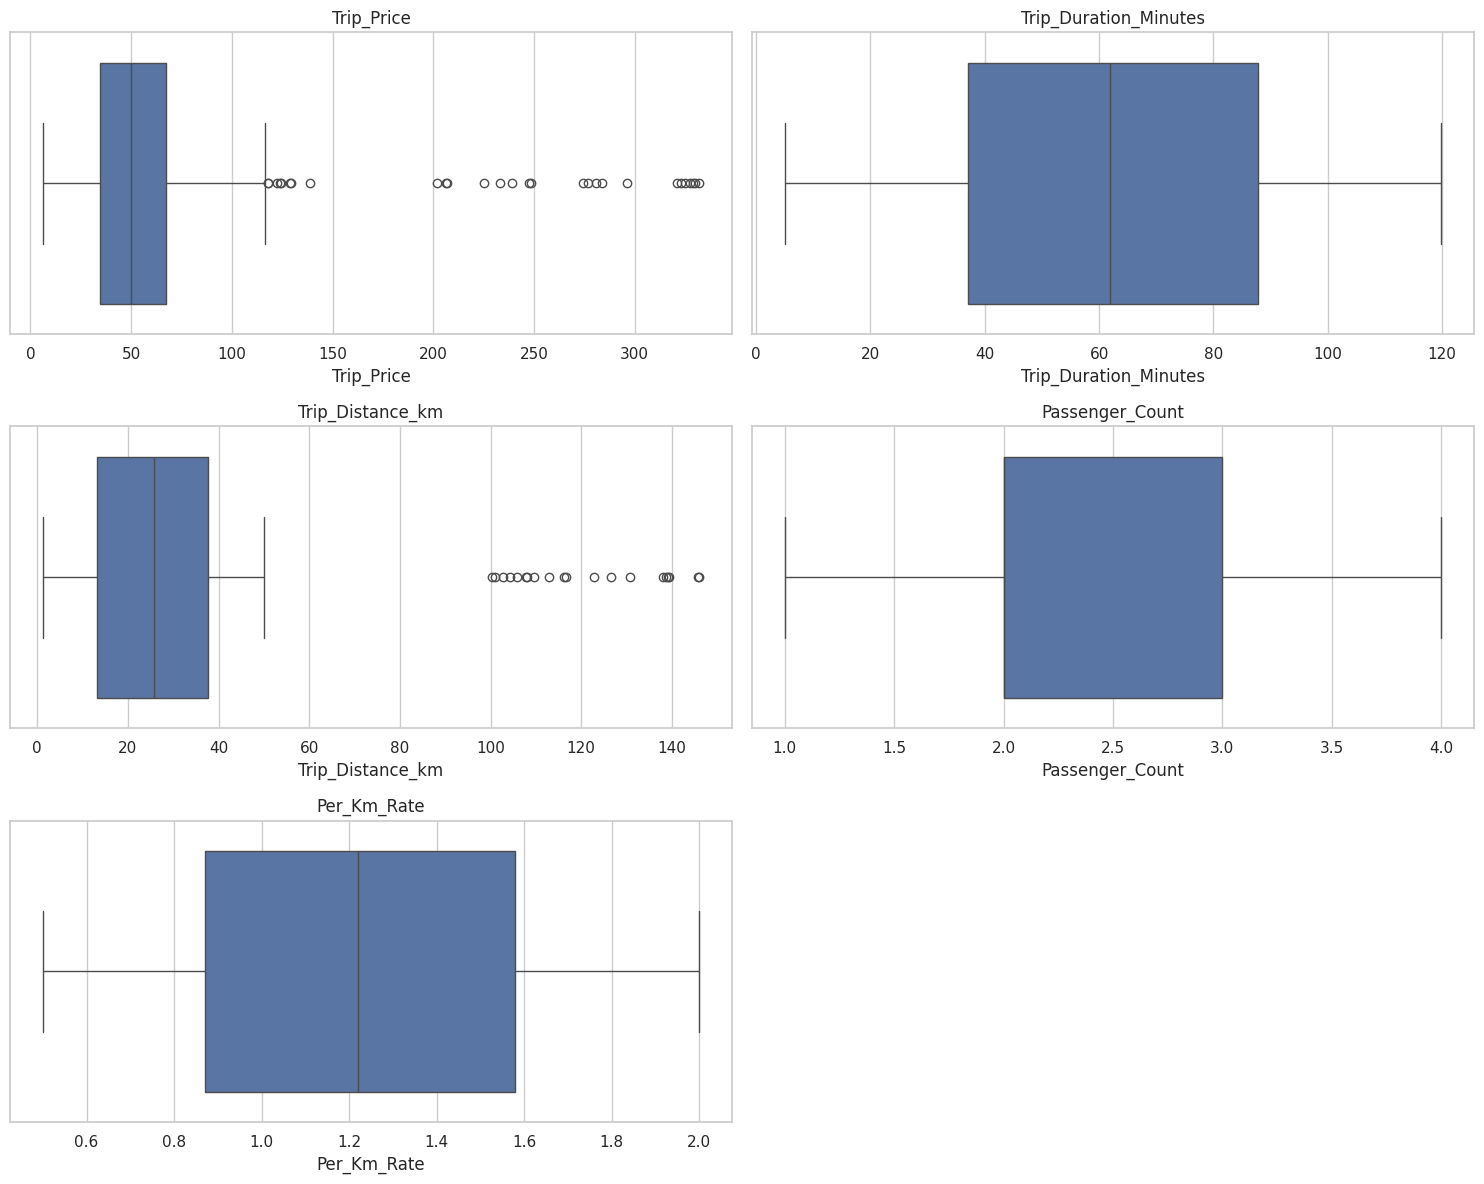

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

sns.boxplot(x=data['Trip_Price'], ax=axes[0, 0])
axes[0, 0].set_title('Trip_Price')

sns.boxplot(x=data['Trip_Duration_Minutes'], ax=axes[0, 1])
axes[0, 1].set_title('Trip_Duration_Minutes')

sns.boxplot(x=data['Trip_Distance_km'], ax=axes[1, 0])
axes[1, 0].set_title('Trip_Distance_km')

sns.boxplot(x=data['Passenger_Count'], ax=axes[1, 1])
axes[1, 1].set_title('Passenger_Count')

sns.boxplot(x=data['Per_Km_Rate'], ax=axes[2, 0])
axes[2, 0].set_title('Per_Km_Rate')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


 Correlation Matrix:
                       Trip_Distance_km  Passenger_Count  Base_Fare  \
Trip_Distance_km               1.000000        -0.028060   0.043345   
Passenger_Count               -0.028060         1.000000   0.021889   
Base_Fare                      0.043345         0.021889   1.000000   
Per_Km_Rate                   -0.035999         0.024647  -0.001481   
Per_Minute_Rate               -0.019611         0.026669  -0.016841   
Trip_Duration_Minutes         -0.033462         0.022904   0.013380   
Trip_Price                     0.683403         0.021726   0.044288   

                       Per_Km_Rate  Per_Minute_Rate  Trip_Duration_Minutes  \
Trip_Distance_km         -0.035999        -0.019611              -0.033462   
Passenger_Count           0.024647         0.026669               0.022904   
Base_Fare                -0.001481        -0.016841               0.013380   
Per_Km_Rate               1.000000         0.028306               0.025799   
Per_Minute_Rate     

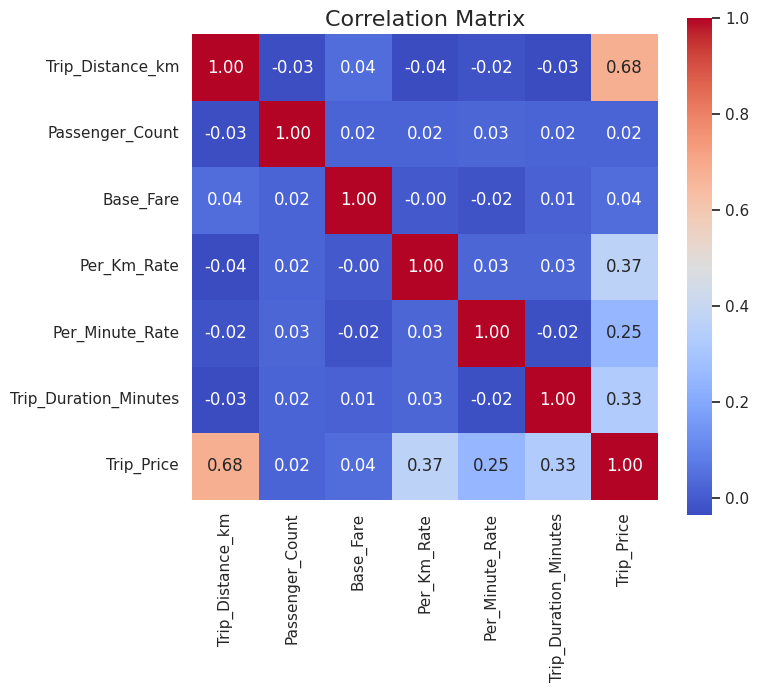

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate the Spearman correlation matrix
spearman_corr = numeric_data.corr(method='spearman')

# Print the Spearman correlation matrix
print(" Correlation Matrix:")
print(spearman_corr)

# Plot the heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 7))
sns.heatmap(
    spearman_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    square=True
)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
data = pd.get_dummies(data, columns=['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], drop_first=True)

In [ ]:
X = data.drop(['Trip_Price'], axis = 1)
y = data['Trip_Price']

In [ ]:
feature_names = X.columns


In [ ]:
from sklearn.preprocessing import RobustScaler

# List of numerical columns to scale
numeric_columns = [
    'Trip_Distance_km', 'Passenger_Count', 'Base_Fare',
    'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes'
]

# Initialize the RobustScaler
scaler = RobustScaler()

# Create a copy of the dataset for scaling
X_scaled = X.copy()

# Apply RobustScaler to the selected numerical columns
X_scaled[numeric_columns] = scaler.fit_transform(X[numeric_columns])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.40, random_state=100)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
# Calculate RMSE manually
mse = mean_squared_error(y_test, y_pred)  # Default is MSE
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

print("RMSE:", rmse)

print("MSE:", mse)



R-squared: 0.9146323331262618
RMSE: 11.74183498666958
MSE: 137.8706888541778


In [ ]:
# Display the final features used by the model
final_features = X_scaled.columns
print("Final Features Used by the Model:")
print(final_features)


Final Features Used by the Model:
Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Time_of_Day_Evening',
       'Time_of_Day_Morning', 'Time_of_Day_Night', 'Day_of_Week_Weekend',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium', 'Weather_Rain',
       'Weather_Snow'],
      dtype='object')


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
cv_rmse = np.sqrt(-cv_scores)

# Print the RMSE for each fold and the average RMSE
print(f"Cross-Validation RMSE for each fold: {cv_rmse}")
print(f"Average RMSE across all folds: {cv_rmse.mean()}")


Cross-Validation RMSE for each fold: [11.09165953 11.61348088 10.8229372   9.69797817  8.2710095 ]
Average RMSE across all folds: 10.299413054559498


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared on test set: {r2}")
print(f"RMSE on test set: {rmse}")
print(f"MSE on test set: {mse}")


R-squared on test set: 0.9146323331262618
RMSE on test set: 11.74183498666958
MSE on test set: 137.8706888541778


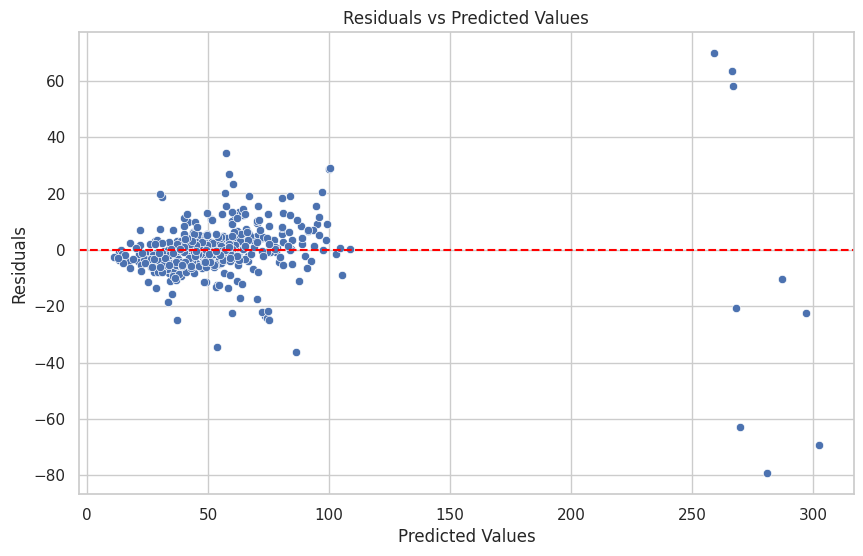

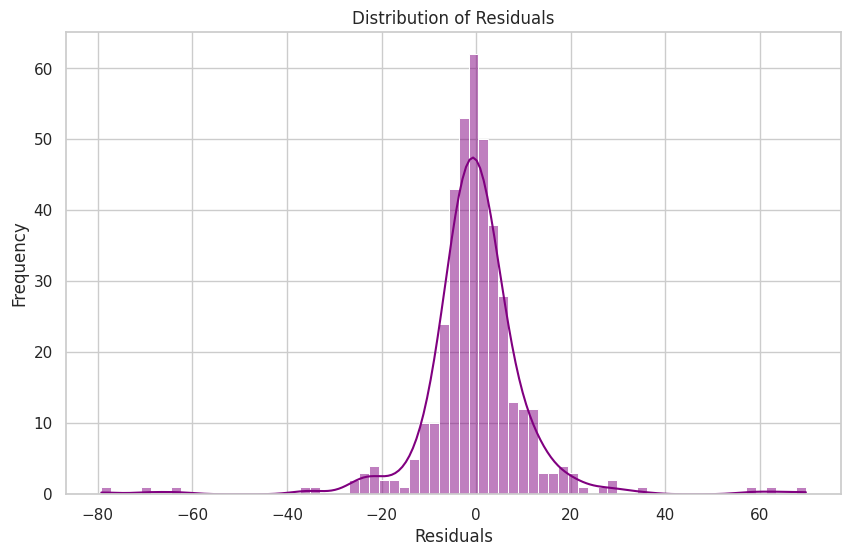

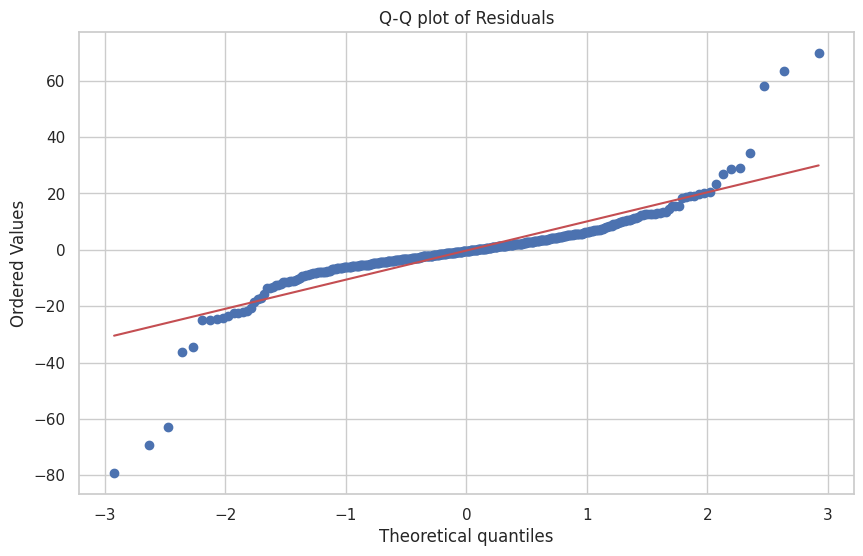

In [ ]:
# Calculate residuals (Actual - Predicted)
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))

# Scatter plot of residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at 0
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Plot a Q-Q plot to check for normality of residuals
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot of Residuals")
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Gradient Boosting Regressor (GBR)
gbr = GradientBoostingRegressor(random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate performance
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Performance:")
print(f"R-squared: {r2_gbr}")
print(f"RMSE: {rmse_gbr}")
print(f"MSE: {mse_gbr}")


# Support Vector Regressor (SVR)
svr = SVR(kernel='rbf')  # You can experiment with different kernels like 'linear', 'poly', etc.

# Train the model
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regressor Performance:")
print(f"R-squared: {r2_svr}")
print(f"RMSE: {rmse_svr}")
print(f"MSE: {mse_svr}")


Gradient Boosting Regressor Performance:
R-squared: 0.9096760449595389
RMSE: 12.077880813776222
MSE: 145.8752049517838

Support Vector Regressor Performance:
R-squared: 0.20995213633778964
RMSE: 35.720371597620584
MSE: 1275.9449470720992


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize XGBoost Regressor
xg_reg = xgb.XGBRegressor(random_state=42)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred_xg = xg_reg.predict(X_test)

# Evaluate performance
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_pred_xg)

# Print the performance metrics
print("XGBoost Regressor Performance:")
print(f"R-squared: {r2_xg}")
print(f"RMSE: {rmse_xg}")
print(f"MSE: {mse_xg}")


XGBoost Regressor Performance:
R-squared: 0.8273563336378643
RMSE: 16.698005195452414
MSE: 278.8233775073558


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(random_state=42)

# Set up k-fold cross-validation (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
mse_scores = []
r2_scores = []

# Perform manual cross-validation
for train_index, test_index in kf.split(X_train):
    # Split data into training and testing sets
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the model
    xg_reg.fit(X_train_cv, y_train_cv)

    # Make predictions
    y_pred_cv = xg_reg.predict(X_test_cv)

    # Evaluate performance (MSE and R2)
    mse = mean_squared_error(y_test_cv, y_pred_cv)
    r2 = r2_score(y_test_cv, y_pred_cv)

    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate the mean and standard deviation of MSE and R2
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_r2 = np.mean(r2_scores)

# Calculate RMSE (Root Mean Squared Error)
mean_rmse = np.sqrt(mean_mse)

# Output cross-validation performance
print("XGBoost Cross-Validation Performance:")
print(f"Mean R-squared: {mean_r2}")
print(f"Mean RMSE from Cross-Validation: {mean_rmse}")
print(f"Mean MSE from Cross-Validation: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")


XGBoost Cross-Validation Performance:
Mean R-squared: 0.8293593943206726
Mean RMSE from Cross-Validation: 16.608372374803793
Mean MSE from Cross-Validation: 275.8380329401458
Standard Deviation of MSE: 159.0518941700411


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5],  # Only relevant for 'poly' kernel
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.2]
}

# Initialize the SVR
svr = SVR()

# Initialize GridSearchCV
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search_svr.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found for Support Vector Regressor: ", grid_search_svr.best_params_)

# Train the model with the best parameters
best_svr = grid_search_svr.best_estimator_

# Predict on test set and evaluate performance
y_pred_svr = best_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"R-squared for Support Vector Regressor: {r2_svr}")
print(f"RMSE for Support Vector Regressor: {rmse_svr}")
print(f"MSE for Support Vector Regressor: {mse_svr}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found for Support Vector Regressor:  {'C': 100, 'degree': 3, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}
R-squared for Support Vector Regressor: 0.9320184109809786
RMSE for Support Vector Regressor: 10.478157508212137
MSE for Support Vector Regressor: 109.79178476690238


<ipython-input-204-8205f4f8d3b3>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_6_features, palette="viridis")


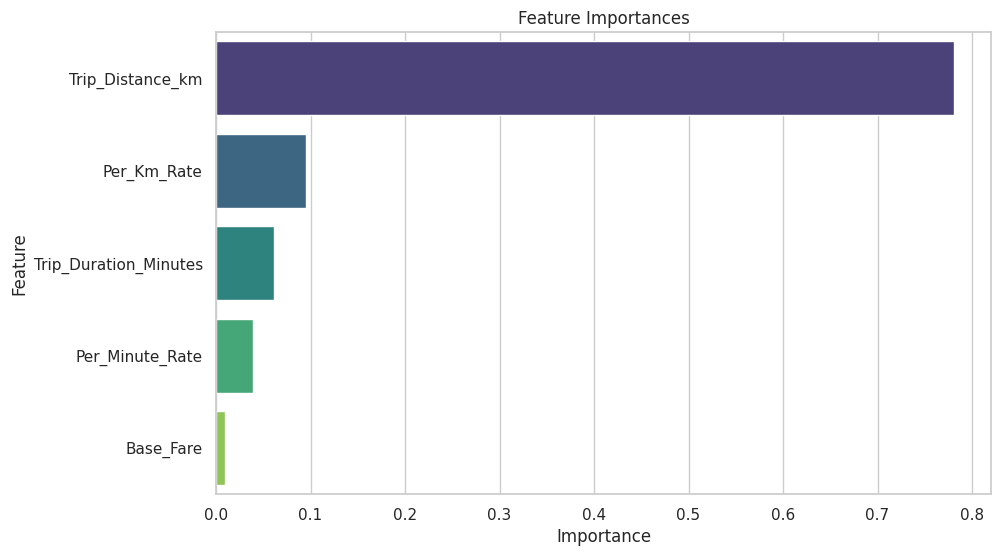

In [ ]:
# prompt: top 6 feature importance random forest  graph

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
# Assuming 'model' and 'feature_names' are defined from previous code

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 6 features
top_6_features = feature_importance_df.head(5)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_6_features, palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<ipython-input-211-6aa075b89fa7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_5_features, palette="viridis")


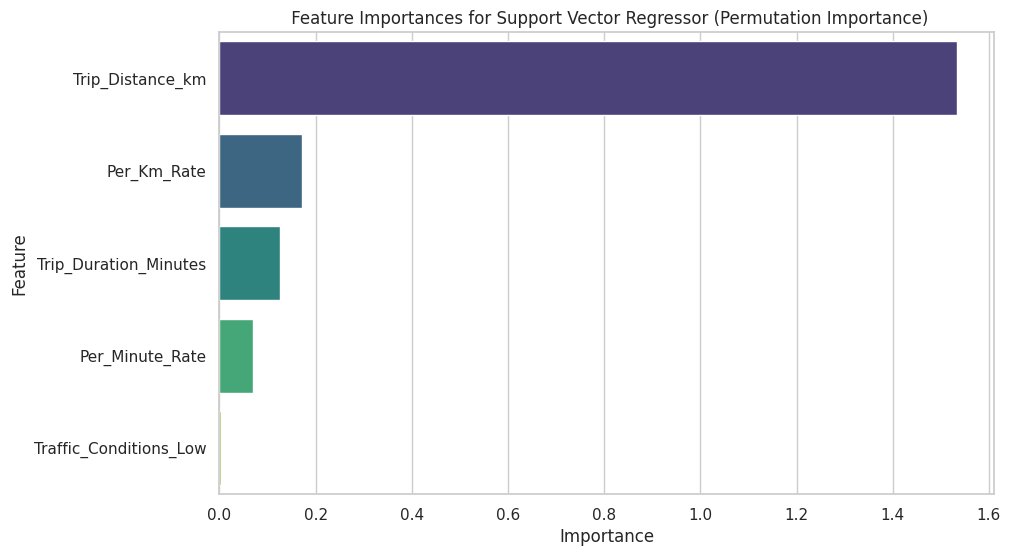

In [ ]:
# prompt: top 5 feature importance for svr

# Assuming 'best_svr' (the best SVR model from GridSearchCV) is defined
# SVR does not have a direct feature_importances_ attribute.
# Instead, you can use techniques like permutation importance or SHAP values.

# Here's an example using permutation importance:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate permutation importance
result = permutation_importance(best_svr, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_5_features = feature_importance_df.head(5)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features, palette="viridis")
plt.title(' Feature Importances for Support Vector Regressor (Permutation Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<ipython-input-212-8351ddcbbd4a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_5_features, palette="viridis")


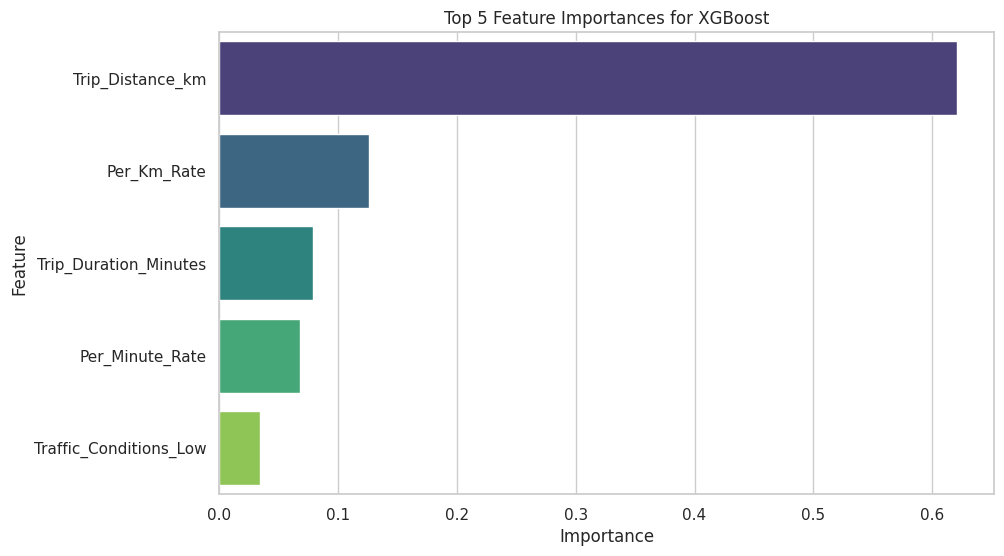

In [ ]:
# prompt: TOP 5 FEATURE IMPORTANCE FOR XG BOOST GRAPH

# Assuming 'xg_reg' (the trained XGBoost model) and 'feature_names' are defined

# Get feature importances from the XGBoost model
importances = xg_reg.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_5_features = feature_importance_df.head(5)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features, palette="viridis")
plt.title('Top 5 Feature Importances for XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you already have the tuned SVR model
# Replace `svr_tuned` with the actual tuned SVR model
# For example, you might have obtained it using GridSearchCV or RandomizedSearchCV
# svr_tuned = your_tuned_svr_model_from_gridsearchcv_or_randomizedsearchcv

# Initialize the models
xg_reg = xgb.XGBRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42)

# Train the models
xg_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
best_svr.fit(X_train, y_train)  # Using the already tuned SVR model

# Make predictions
y_pred_xg = xg_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)
y_pred_svr = best_svr.predict(X_test)  # Predictions for the tuned SVR

# Evaluate performance for XGBoost
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_pred_xg)

# Evaluate performance for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluate performance for Tuned SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the results for all models
print("XGBoost Performance:")
print(f"R-squared: {r2_xg}")
print(f"RMSE: {rmse_xg}")
print(f"MSE: {mse_xg}")
print("\n")

print("Random Forest Performance:")
print(f"R-squared: {r2_rf}")
print(f"RMSE: {rmse_rf}")
print(f"MSE: {mse_rf}")
print("\n")

print("Tuned Support Vector Regression (SVR) Performance:")
print(f"R-squared: {r2_svr}")
print(f"RMSE: {rmse_svr}")
print(f"MSE: {mse_svr}")


XGBoost Performance:
R-squared: 0.8273563336378643
RMSE: 16.698005195452414
MSE: 278.8233775073558


Random Forest Performance:
R-squared: 0.9146323331262618
RMSE: 11.74183498666958
MSE: 137.8706888541778


Tuned Support Vector Regression (SVR) Performance:
R-squared: 0.9320184109809786
RMSE: 10.478157508212137
MSE: 109.79178476690238


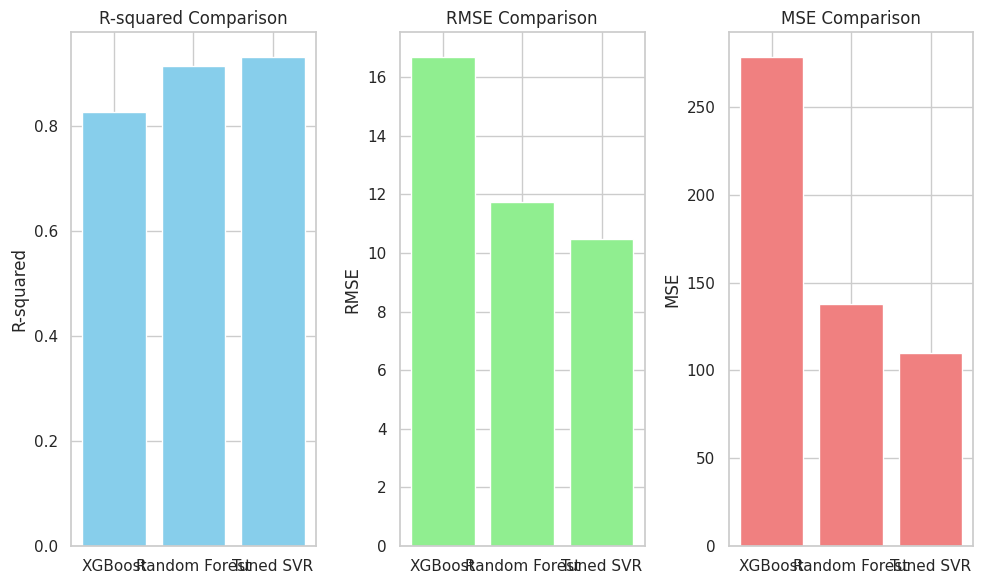

In [ ]:
import matplotlib.pyplot as plt

# Define the model performance metrics
models = ['XGBoost', 'Random Forest', 'Tuned SVR']
r2_scores = [r2_xg, r2_rf, r2_svr]
rmse_scores = [rmse_xg, rmse_rf, rmse_svr]
mse_scores = [mse_xg, mse_rf, mse_svr]

# Plot R-squared scores
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.bar(models, r2_scores, color='skyblue')
plt.title('R-squared Comparison')
plt.ylabel('R-squared')

# Plot RMSE scores
plt.subplot(1, 3, 2)
plt.bar(models, rmse_scores, color='lightgreen')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

# Plot MSE scores
plt.subplot(1, 3, 3)
plt.bar(models, mse_scores, color='lightcoral')
plt.title('MSE Comparison')
plt.ylabel('MSE')

# Display the plots
plt.tight_layout()
plt.show()
